In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


import os, shutil

plt.style.use('ggplot')

%matplotlib inline

Using TensorFlow backend.


In [2]:
# importing dataset

original_dataset_dir = 'data/PetImages'

# subset directories to store images

# directory names

base_dir = 'data/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_dir = os.path.join(base_dir,'validation')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_dir = os.path.join(base_dir,'test')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

try:
    # creating directories: 
    
    os.mkdir(base_dir)
    
    os.mkdir(train_dir)    
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)        
    
    os.mkdir(validation_dir)    
    os.mkdir(validation_cats_dir)    
    os.mkdir(validation_dogs_dir)
    
    
    os.mkdir(test_dir)    
    os.mkdir(test_cats_dir)    
    os.mkdir(test_dogs_dir)
    
    for i in range(1000):
        # training sample
        
        file_name = str(i)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(train_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(train_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
    for i in range(1000,1500):
        
        # validation sample
        
        file_name = str(i)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(validation_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(validation_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
        # testing sample
        
        j = i + 500
        
        file_name = str(j)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(test_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(test_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
    
    
except FileExistsError:
    print('base_dir:',base_dir,'already exist')
    print('no sub-directories will be created')

base_dir: data/cats_and_dogs_small already exist
no sub-directories will be created


In [3]:
# check number of images in each sample
print('Total Cat images')
print('training images: ',len(os.listdir(train_cats_dir)))
print('validation images: ',len(os.listdir(validation_cats_dir)))
print('testing images: ', len(os.listdir(test_cats_dir)))
print('')
print('Total Dog images ')
print('training images: ',len(os.listdir(train_dogs_dir)))
print('validation images: ',len(os.listdir(validation_dogs_dir)))
print('testing images: ', len(os.listdir(test_dogs_dir)))

Total Cat images
training images:  1000
validation images:  500
testing images:  500

Total Dog images 
training images:  1000
validation images:  500
testing images:  500


In [4]:
# Instantiating a small convnet


model = models.Sequential()

model.add(layers.Conv2D(filters=32,
                        kernel_size=[3,3],
                        activation='relu',
                        input_shape=[150,150,3]))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=64,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=128,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=128,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
# configure the model for training

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
# reading images

# rescaling all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=[150,150],
                                                    batch_size=20,
                                                    class_mode='binary') # binary labels
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=[150,150],
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
# Fit model using a batch generator

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30


/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.6937 - acc: 0.5071

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 78s 778ms/step - loss: 0.6933 - acc: 0.5100 - val_loss: 0.6818 - val_acc: 0.5000
Epoch 2/30
  1/100 [..............................] - ETA: 1:06 - loss: 0.7040 - acc: 0.4500

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

 24/100 [======>.......................] - ETA: 45s - loss: 0.6710 - acc: 0.5917

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 71s 711ms/step - loss: 0.6627 - acc: 0.6030 - val_loss: 0.6375 - val_acc: 0.6590
Epoch 3/30
 29/100 [=======>......................] - ETA: 41s - loss: 0.6471 - acc: 0.6034

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.6220 - acc: 0.6520

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 707ms/step - loss: 0.6222 - acc: 0.6505 - val_loss: 0.6142 - val_acc: 0.6550
Epoch 4/30
 37/100 [==========>...................] - ETA: 37s - loss: 0.5731 - acc: 0.7135

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.5750 - acc: 0.6944

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 708ms/step - loss: 0.5747 - acc: 0.6945 - val_loss: 0.5909 - val_acc: 0.6860
Epoch 5/30
 48/100 [=============>................] - ETA: 30s - loss: 0.5415 - acc: 0.7281

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 71s 707ms/step - loss: 0.5354 - acc: 0.7265 - val_loss: 0.6299 - val_acc: 0.6420
Epoch 6/30
 31/100 [========>.....................] - ETA: 40s - loss: 0.4988 - acc: 0.7629

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.5025 - acc: 0.7540

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 706ms/step - loss: 0.5023 - acc: 0.7530 - val_loss: 0.5761 - val_acc: 0.6920
Epoch 7/30
 68/100 [===================>..........] - ETA: 18s - loss: 0.4759 - acc: 0.7772

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.4728 - acc: 0.7783

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 72s 718ms/step - loss: 0.4722 - acc: 0.7790 - val_loss: 0.5993 - val_acc: 0.6820
Epoch 8/30
 53/100 [==============>...............] - ETA: 28s - loss: 0.4507 - acc: 0.7915

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 73s 727ms/step - loss: 0.4481 - acc: 0.7940 - val_loss: 0.5494 - val_acc: 0.7280
Epoch 9/30
 86/100 [========================>.....] - ETA: 7s - loss: 0.4250 - acc: 0.8012

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.4231 - acc: 0.8040

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 68s 679ms/step - loss: 0.4228 - acc: 0.8045 - val_loss: 0.5847 - val_acc: 0.7080
Epoch 10/30
 84/100 [========================>.....] - ETA: 9s - loss: 0.3922 - acc: 0.8262

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.3900 - acc: 0.8247

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 69s 689ms/step - loss: 0.3893 - acc: 0.8255 - val_loss: 0.5518 - val_acc: 0.7240
Epoch 11/30
 13/100 [==>...........................] - ETA: 49s - loss: 0.3944 - acc: 0.8192

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.3535 - acc: 0.8348

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 704ms/step - loss: 0.3534 - acc: 0.8350 - val_loss: 0.5619 - val_acc: 0.7180
Epoch 12/30
 75/100 [=====================>........] - ETA: 14s - loss: 0.3302 - acc: 0.8587

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 70s 699ms/step - loss: 0.3352 - acc: 0.8540 - val_loss: 0.5675 - val_acc: 0.7300
Epoch 13/30
 48/100 [=============>................] - ETA: 32s - loss: 0.2975 - acc: 0.8760

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.3054 - acc: 0.8692

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 701ms/step - loss: 0.3057 - acc: 0.8685 - val_loss: 0.5901 - val_acc: 0.7250
Epoch 14/30
 69/100 [===================>..........] - ETA: 18s - loss: 0.2672 - acc: 0.8906

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 69s 691ms/step - loss: 0.2766 - acc: 0.8830 - val_loss: 0.5823 - val_acc: 0.7380
Epoch 15/30
 76/100 [=====================>........] - ETA: 13s - loss: 0.2513 - acc: 0.9013

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.2523 - acc: 0.9035

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 67s 675ms/step - loss: 0.2518 - acc: 0.9035 - val_loss: 0.6087 - val_acc: 0.7270
Epoch 16/30
  5/100 [>.............................] - ETA: 53s - loss: 0.2426 - acc: 0.9300

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 68s 678ms/step - loss: 0.2335 - acc: 0.9080 - val_loss: 0.6486 - val_acc: 0.7150
Epoch 17/30
 14/100 [===>..........................] - ETA: 52s - loss: 0.1889 - acc: 0.9321

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.2040 - acc: 0.9197

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 713ms/step - loss: 0.2046 - acc: 0.9195 - val_loss: 0.8925 - val_acc: 0.6530
Epoch 18/30
  5/100 [>.............................] - ETA: 55s - loss: 0.2571 - acc: 0.9200

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.1930 - acc: 0.9278

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 707ms/step - loss: 0.1947 - acc: 0.9275 - val_loss: 0.6575 - val_acc: 0.7270
Epoch 19/30
 80/100 [=======================>......] - ETA: 12s - loss: 0.1578 - acc: 0.9419

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 93/100 [==========================>...] - ETA: 4s - loss: 0.1561 - acc: 0.9425

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.1576 - acc: 0.9419

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 72s 715ms/step - loss: 0.1586 - acc: 0.9410 - val_loss: 0.7075 - val_acc: 0.7250
Epoch 20/30
 88/100 [=========================>....] - ETA: 7s - loss: 0.1479 - acc: 0.9472

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.1505 - acc: 0.9465

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 703ms/step - loss: 0.1500 - acc: 0.9470 - val_loss: 0.7362 - val_acc: 0.7310
Epoch 21/30
 95/100 [===========================>..] - ETA: 2s - loss: 0.1254 - acc: 0.9558

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.1242 - acc: 0.9571

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 703ms/step - loss: 0.1239 - acc: 0.9575 - val_loss: 0.8232 - val_acc: 0.7250
Epoch 22/30
100/100 [==============================] - 72s 722ms/step - loss: 0.1098 - acc: 0.9595 - val_loss: 0.8044 - val_acc: 0.7120
Epoch 23/30
 76/100 [=====================>........] - ETA: 14s - loss: 0.0864 - acc: 0.9743

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0932 - acc: 0.9672

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 73s 730ms/step - loss: 0.0935 - acc: 0.9670 - val_loss: 0.8989 - val_acc: 0.7030
Epoch 24/30
  3/100 [..............................] - ETA: 57s - loss: 0.0582 - acc: 1.0000

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 70s 702ms/step - loss: 0.0783 - acc: 0.9770 - val_loss: 1.0565 - val_acc: 0.7010
Epoch 25/30
 45/100 [============>.................] - ETA: 32s - loss: 0.0545 - acc: 0.9867

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0721 - acc: 0.9737

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 702ms/step - loss: 0.0719 - acc: 0.9740 - val_loss: 0.8761 - val_acc: 0.7120
Epoch 26/30
 64/100 [==================>...........] - ETA: 21s - loss: 0.0557 - acc: 0.9836

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0632 - acc: 0.9808

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 72s 723ms/step - loss: 0.0630 - acc: 0.9810 - val_loss: 0.9610 - val_acc: 0.7250
Epoch 27/30
 69/100 [===================>..........] - ETA: 18s - loss: 0.0614 - acc: 0.9833

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0576 - acc: 0.9838

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 71s 706ms/step - loss: 0.0577 - acc: 0.9835 - val_loss: 0.9798 - val_acc: 0.7150
Epoch 28/30
 85/100 [========================>.....] - ETA: 8s - loss: 0.0455 - acc: 0.9900

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

100/100 [==============================] - 70s 700ms/step - loss: 0.0419 - acc: 0.9910 - val_loss: 1.0222 - val_acc: 0.7300
Epoch 29/30
  9/100 [=>............................] - ETA: 53s - loss: 0.0146 - acc: 1.0000

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9894

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 700ms/step - loss: 0.0389 - acc: 0.9895 - val_loss: 1.0547 - val_acc: 0.7170
Epoch 30/30
  5/100 [>.............................] - ETA: 55s - loss: 0.0320 - acc: 1.0000

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/ho

 99/100 [============================>.] - ETA: 0s - loss: 0.0380 - acc: 0.9889

/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/sushan/anaconda3/envs/tensor_env/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/su

100/100 [==============================] - 70s 702ms/step - loss: 0.0377 - acc: 0.9890 - val_loss: 1.1208 - val_acc: 0.7250


In [9]:
# saving model
model.save('models/cats_and_dog_1.h')

In [10]:
# loading saved model


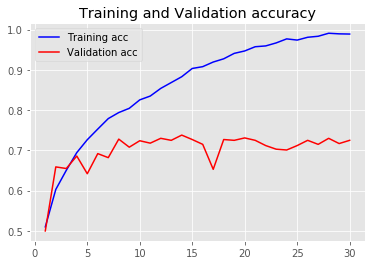

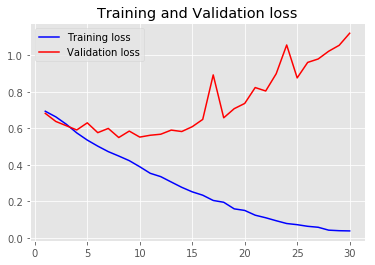

In [11]:
# plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [12]:
# data augmentation set up
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

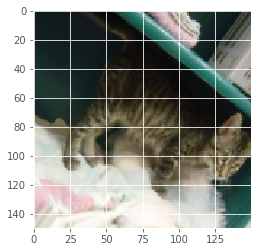

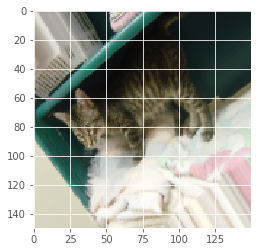

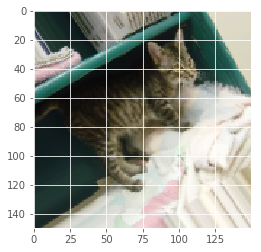

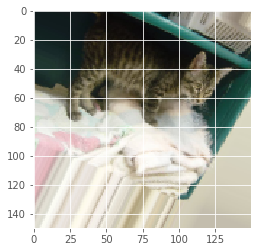

In [14]:
# some randomly augmented pictures 
fnames = [os.path.join(train_cats_dir,fname) 
          for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img) #convert to numpy array; 3d 150*150*3
x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images. Loops indefinitely, 
# so you need to break the loop at some point!

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()
